<a href="https://colab.research.google.com/github/calosos/proyecto_CD_CH_Diamantes/blob/main/Diamanrtes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamantes: Dentro del mundo de los diamantes se ha relevado una gama de características que inciden en el precio y en su clusterizacion.
Se ha conformado y para iniciar la con el Data Wrangling vamos a empezar a limpiar, eliminar duplicados, observar algunas relaciones etc.


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from seaborn import distplot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

Mounted at /content/drive


# Data Acquisition

In [ ]:
ruta = '/content/drive/MyDrive/Datos_actual/diamonds.csv'

In [ ]:
df = pd.read_csv(ruta)

# Data Wrangling

In [ ]:
#Vemos las primeras filas del dataset
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
#Nombre de los atributos
df.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
df.describe().T

count         mean          std    min     25%      50%      75%  \
carat  53940.0     0.797940     0.474011    0.2    0.40     0.70     1.04   
depth  53940.0    61.749405     1.432621   43.0   61.00    61.80    62.50   
table  53940.0    57.457184     2.234491   43.0   56.00    57.00    59.00   
price  53940.0  3932.799722  3989.439738  326.0  950.00  2401.00  5324.25   
x      53940.0     5.731157     1.121761    0.0    4.71     5.70     6.54   
y      53940.0     5.734526     1.142135    0.0    4.72     5.71     6.54   
z      53940.0     3.538734     0.705699    0.0    2.91     3.53     4.04   

            max  
carat      5.01  
depth     79.00  
table     95.00  
price  18823.00  
x         10.74  
y         58.90  
z         31.80

In [ ]:
#Dimensiones
df.shape

(53940, 12)

In [ ]:
#Veamos las 5 ultimas filas
df.tail()

carat        cut color clarity  depth  table  price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

In [ ]:
borrar =df[(df['x']==0) | (df['y']==0) | (df['z']==0) ]

In [ ]:
borrar =list(borrar.index)


In [ ]:
df_limp= df

In [ ]:
df_limp=df.drop(borrar)

In [ ]:
df.shape

(53940, 10)

In [ ]:
df_limp.shape

(53920, 10)

In [ ]:
df.shape[0] - df_limp.shape[0]

20

In [ ]:
df_limp   = df_limp.drop_duplicates()

In [ ]:
df_limp.shape

(53775, 10)

In [ ]:
#Tipo de dato para cada columna
df_limp.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
#Completitud de los datos
df_limp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53775 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53775 non-null  float64
 1   cut      53775 non-null  object 
 2   color    53775 non-null  object 
 3   clarity  53775 non-null  object 
 4   depth    53775 non-null  float64
 5   table    53775 non-null  float64
 6   price    53775 non-null  int64  
 7   x        53775 non-null  float64
 8   y        53775 non-null  float64
 9   z        53775 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
df_limp['volumen'] = df_limp['x']*df_limp['y']*df_limp['z']

In [ ]:
df_limp['calculo']=df_limp['volumen']/df_limp['price']

In [ ]:
df_limp.describe().T

count         mean          std         min         25%  \
carat    53775.0     0.797536     0.473169    0.200000    0.400000   
depth    53775.0    61.748232     1.429639   43.000000   61.000000   
table    53775.0    57.457806     2.233257   43.000000   56.000000   
price    53775.0  3931.220288  3985.918716  326.000000  951.000000   
x        53775.0     5.731579     1.118611    3.730000    4.710000   
y        53775.0     5.734909     1.139451    3.680000    4.720000   
z        53775.0     3.539964     0.702017    1.070000    2.910000   
volumen  53775.0   129.872846    78.136513   31.707984   65.214611   
calculo  53775.0     0.050998     0.023908    0.007631    0.032849   

                 50%          75%           max  
carat       0.700000     1.040000      5.010000  
depth      61.800000    62.500000     79.000000  
table      57.000000    59.000000     95.000000  
price    2401.000000  5324.000000  18823.000000  
x           5.700000     6.540000     10.740000  
y           5.710000     6.540000     58.900000  
z           3.530000     4.030000     31.800000  
volumen   114.852720   170.839422   3840.598060  
calculo     0.046625     0.066182      0.425636

In [ ]:
df_limp.color.value_counts()

G    11254
E     9776
F     9517
H     8266
D     6754
I     5406
J     2802
Name: color, dtype: int64

In [ ]:
df_limp.clarity.value_counts()

SI1     13030
VS2     12225
SI2      9142
VS1      8155
VVS2     5056
VVS1     3646
IF       1784
I1        737
Name: clarity, dtype: int64

In [ ]:
df_limp.table.value_counts()

56.0    9849
57.0    9695
58.0    8349
59.0    6555
55.0    6242
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: table, Length: 127, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


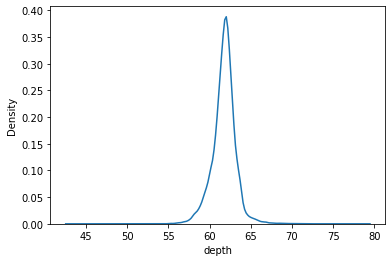

In [ ]:
#histograma
distplot(df_limp.depth, hist=False);

Como podemos observar el depth que es la medida de arriba hacia abajo de un diamante, El conjunto de datos está balanceado, los valores estan dentro de un rango

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

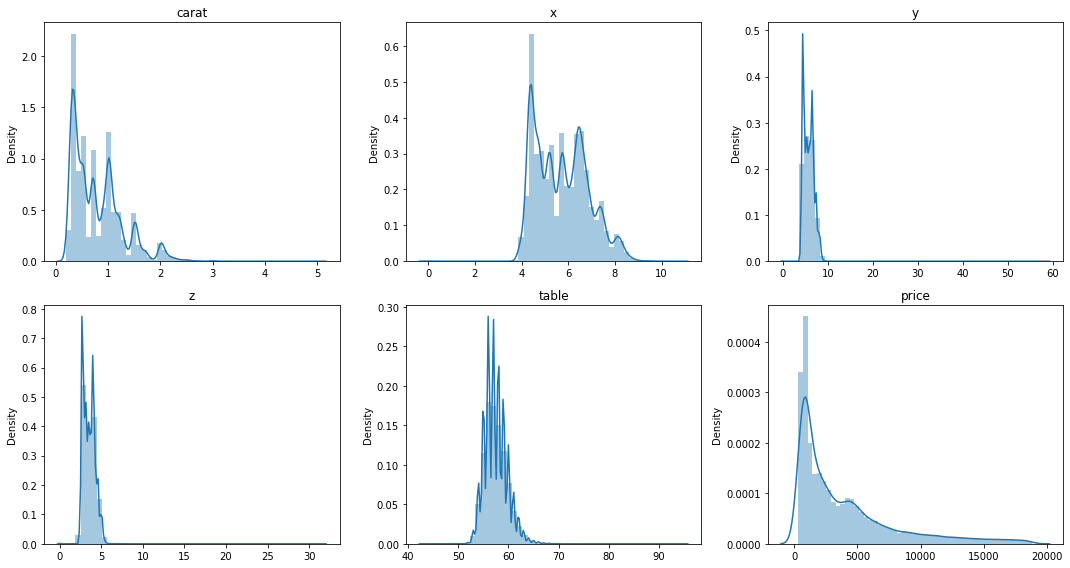

In [ ]:
#Analicemos otras variables importantes
variables = ['carat', 'x', 'y','z','table','price']

columns = 3

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(df[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout();

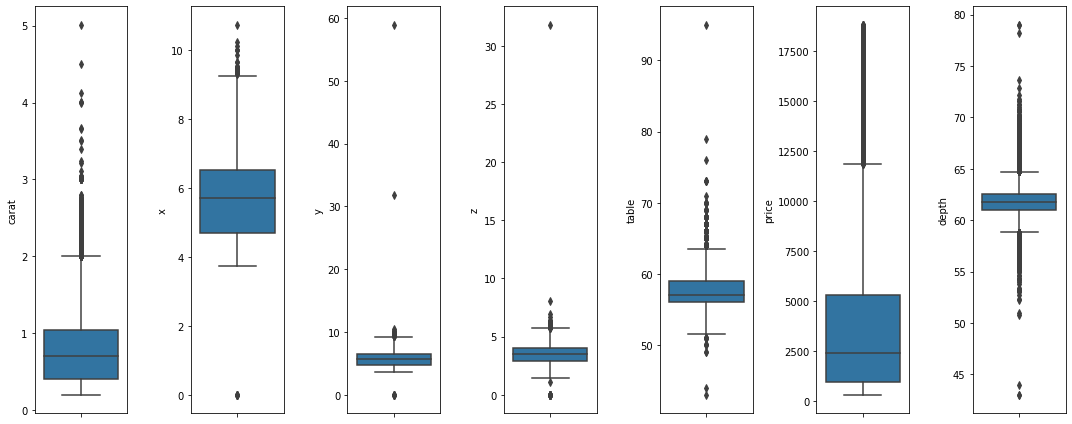

In [ ]:
variables = ['carat', 'x', 'y','z','table','price', 'depth']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 21.9 MB 140 kB/s
     |████████████████████████████████| 102 kB 5.3 MB/s 
     |████████████████████████████████| 690 kB 31.4 MB/s 
     |████████████████████████████████| 4.7 MB 39.7 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 812 kB 70.5 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=d522107619d2346403a511ece84587397ca99d7f251969478007dba611835e62
  Stored in directory: /tmp/pip-ephem-wheel-cache-3i5zen1g/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ef23d0b7ec1860d504c5a9ad7c34acfba7c38dd646a0e0e13538b410ecb9b803
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash

In [ ]:
import pandas_profiling

In [ ]:
profile  = pandas_profiling.ProfileReport(df_limp)
pandas_profiling: profile.to_file('reporte2.html')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
correlation = wine_quality.corr(method="pearson")
correlation.head()